# Travel insurance 

# Setting up Libraries

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

%matplotlib inline

# Data 

Source: [Travel insurance predictions](https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data)

Upload and clean dataset. It was checked from the source the data was clean.

In [2]:
data = pd.read_csv("TravelInsurancePrediction.csv")
data.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
data.columns

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [4]:
data = data.drop(["Unnamed: 0","GraduateOrNot"], axis = 1)
#data['GraduateOrNot'] = data['GraduateOrNot'].map({'Yes': 2, 'No': 1})
data['FrequentFlyer']  = data['FrequentFlyer'].map({'Yes': 2, 'No': 1})

data['EverTravelledAbroad']  = data['EverTravelledAbroad'].map({'Yes': 2, 'No': 1})
#data["TravelInsurance"]  = data["TravelInsurance"].map({1: 2, 0: 1})
data['Employment Type']  = data['Employment Type'].map({'Government Sector': 2, 
                                                        'Private Sector/Self Employed': 1})
data.head()



,Age,Employment Type,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,2,400000,6,1,1,1,0
1,31,1,1250000,7,0,1,1,0
2,34,1,500000,4,1,1,1,1
3,28,1,700000,3,1,1,1,0
4,28,1,700000,8,1,2,1,0


In [5]:
mu  = np.mean(data['AnnualIncome'])
std = np.std(data['AnnualIncome'])
data['AnnualIncome'] =(data['AnnualIncome'] - mu)/std
                                                              

# Prepare data for analysis

In [6]:
y = data.TravelInsurance.values
X = data.drop(["TravelInsurance"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.40, 
                                                    random_state = 42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                    test_size = 0.40, 
                                                    random_state = 42)




In [7]:
X_train.columns

Index(['Age', 'Employment Type', 'AnnualIncome', 'FamilyMembers',
       'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad'],
      dtype='object')

In [8]:
X_train.EverTravelledAbroad

1442    1
957     1
820     1
1419    1
1752    1
       ..
1017    1
702     1
20      1
1783    1
387     1
Name: EverTravelledAbroad, Length: 715, dtype: int64

In [9]:
X_train.head()

,Age,Employment Type,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
1442,26,1,-1.148641,2,0,1,1
957,28,1,-1.148641,5,1,1,1
820,25,1,0.576591,4,0,1,1
1419,27,2,0.311171,5,0,1,1
1752,26,2,-1.148641,5,1,1,1


In [10]:
X_valid.head()

,Age,Employment Type,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
1426,26,2,-1.148641,6,1,1,1
144,31,1,0.842012,4,0,1,1
1230,31,2,1.505563,6,0,2,2
1206,29,1,0.709302,3,0,1,1
1560,28,1,0.709302,4,0,1,1


In [11]:
X_test.head()

,Age,Employment Type,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
212,28,1,-0.485090,5,1,1,1
1517,26,1,1.240142,4,1,1,2
785,29,1,0.709302,7,0,1,2
1175,33,2,-1.414061,4,1,1,1
1760,34,1,1.505563,3,0,2,2


In [12]:
len(y_train)

715

In [13]:
len(y_valid)


477

In [14]:
len(y_test)

795

# Create, compile, and train a model
8 columns = 8 neuron

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(7,)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 7)                 0         
                                                                 
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='SGD', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train, validation_data=(X_valid, y_valid), epochs=1000)

Epoch 1/1000
23/23 [==============================] - 1s 10ms/step - loss: 0.6854 - accuracy: 0.6000 - val_loss: 0.6454 - val_accuracy: 0.6583
Epoch 2/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.6530 - accuracy: 0.6476 - val_loss: 0.6435 - val_accuracy: 0.6583
Epoch 3/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.6502 - accuracy: 0.6476 - val_loss: 0.6466 - val_accuracy: 0.6583
Epoch 4/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.6517 - accuracy: 0.6476 - val_loss: 0.6462 - val_accuracy: 0.6583
Epoch 5/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.6485 - accuracy: 0.6476 - val_loss: 0.6543 - val_accuracy: 0.6583
Epoch 6/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.6481 - accuracy: 0.6476 - val_loss: 0.6382 - val_accuracy: 0.6583
Epoch 7/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.6458 - accuracy: 0.6476 - val_loss: 0.6380 - val_accuracy: 0.6583
Epoch

23/23 [==============================] - 0s 4ms/step - loss: 0.5977 - accuracy: 0.6783 - val_loss: 0.5888 - val_accuracy: 0.6625
Epoch 59/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5966 - accuracy: 0.6727 - val_loss: 0.5882 - val_accuracy: 0.6583
Epoch 60/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5946 - accuracy: 0.6741 - val_loss: 0.5942 - val_accuracy: 0.6583
Epoch 61/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5930 - accuracy: 0.6839 - val_loss: 0.5921 - val_accuracy: 0.6583
Epoch 62/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5951 - accuracy: 0.6699 - val_loss: 0.5856 - val_accuracy: 0.6813
Epoch 63/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5905 - accuracy: 0.6937 - val_loss: 0.5848 - val_accuracy: 0.6876
Epoch 64/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5940 - accuracy: 0.6741 - val_loss: 0.5952 - val_accuracy: 0.7799
Epoch 65/1000

23/23 [==============================] - 0s 4ms/step - loss: 0.5603 - accuracy: 0.7455 - val_loss: 0.5575 - val_accuracy: 0.7883
Epoch 116/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5590 - accuracy: 0.7399 - val_loss: 0.5602 - val_accuracy: 0.7442
Epoch 117/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5617 - accuracy: 0.7552 - val_loss: 0.5631 - val_accuracy: 0.7379
Epoch 118/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5577 - accuracy: 0.7469 - val_loss: 0.5564 - val_accuracy: 0.7673
Epoch 119/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5554 - accuracy: 0.7580 - val_loss: 0.5628 - val_accuracy: 0.7463
Epoch 120/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5591 - accuracy: 0.7427 - val_loss: 0.5763 - val_accuracy: 0.7149
Epoch 121/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5601 - accuracy: 0.7483 - val_loss: 0.5751 - val_accuracy: 0.7023
Epoch 1

Epoch 172/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5467 - accuracy: 0.7594 - val_loss: 0.5455 - val_accuracy: 0.7987
Epoch 173/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5453 - accuracy: 0.7483 - val_loss: 0.5450 - val_accuracy: 0.7841
Epoch 174/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5443 - accuracy: 0.7510 - val_loss: 0.5650 - val_accuracy: 0.7086
Epoch 175/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5460 - accuracy: 0.7413 - val_loss: 0.5450 - val_accuracy: 0.7841
Epoch 176/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5484 - accuracy: 0.7483 - val_loss: 0.5481 - val_accuracy: 0.7966
Epoch 177/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5469 - accuracy: 0.7510 - val_loss: 0.5783 - val_accuracy: 0.6751
Epoch 178/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5490 - accuracy: 0.7566 - val_loss: 0.5437 - val_accuracy:

Epoch 229/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5415 - accuracy: 0.7566 - val_loss: 0.5445 - val_accuracy: 0.7736
Epoch 230/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5386 - accuracy: 0.7483 - val_loss: 0.5564 - val_accuracy: 0.7317
Epoch 231/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.5452 - accuracy: 0.7455 - val_loss: 0.5410 - val_accuracy: 0.7841
Epoch 232/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5407 - accuracy: 0.7441 - val_loss: 0.5649 - val_accuracy: 0.7862
Epoch 233/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5434 - accuracy: 0.7566 - val_loss: 0.5427 - val_accuracy: 0.7945
Epoch 234/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5377 - accuracy: 0.7483 - val_loss: 0.5403 - val_accuracy: 0.8008
Epoch 235/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5462 - accuracy: 0.7469 - val_loss: 0.5409 - val_accuracy:

Epoch 286/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5417 - accuracy: 0.7469 - val_loss: 0.5518 - val_accuracy: 0.7966
Epoch 287/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5342 - accuracy: 0.7552 - val_loss: 0.5449 - val_accuracy: 0.7945
Epoch 288/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5398 - accuracy: 0.7538 - val_loss: 0.5384 - val_accuracy: 0.7966
Epoch 289/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5401 - accuracy: 0.7469 - val_loss: 0.5383 - val_accuracy: 0.7925
Epoch 290/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5364 - accuracy: 0.7636 - val_loss: 0.5767 - val_accuracy: 0.6625
Epoch 291/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5498 - accuracy: 0.7427 - val_loss: 0.5384 - val_accuracy: 0.7904
Epoch 292/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5481 - accuracy: 0.7538 - val_loss: 0.5385 - val_accuracy:

Epoch 343/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5362 - accuracy: 0.7622 - val_loss: 0.5490 - val_accuracy: 0.7463
Epoch 344/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5346 - accuracy: 0.7608 - val_loss: 0.5388 - val_accuracy: 0.7757
Epoch 345/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5331 - accuracy: 0.7580 - val_loss: 0.5460 - val_accuracy: 0.7945
Epoch 346/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5384 - accuracy: 0.7608 - val_loss: 0.5364 - val_accuracy: 0.7925
Epoch 347/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5369 - accuracy: 0.7441 - val_loss: 0.5520 - val_accuracy: 0.7966
Epoch 348/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5356 - accuracy: 0.7510 - val_loss: 0.5551 - val_accuracy: 0.7296
Epoch 349/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5340 - accuracy: 0.7510 - val_loss: 0.5577 - val_accuracy:

Epoch 400/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5318 - accuracy: 0.7538 - val_loss: 0.5350 - val_accuracy: 0.7966
Epoch 401/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5327 - accuracy: 0.7566 - val_loss: 0.5402 - val_accuracy: 0.7945
Epoch 402/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5328 - accuracy: 0.7650 - val_loss: 0.5460 - val_accuracy: 0.7925
Epoch 403/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5330 - accuracy: 0.7622 - val_loss: 0.5360 - val_accuracy: 0.7904
Epoch 404/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5316 - accuracy: 0.7566 - val_loss: 0.5354 - val_accuracy: 0.7945
Epoch 405/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5313 - accuracy: 0.7566 - val_loss: 0.5353 - val_accuracy: 0.7925
Epoch 406/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5389 - accuracy: 0.7524 - val_loss: 0.5348 - val_accuracy:

Epoch 457/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5346 - accuracy: 0.7497 - val_loss: 0.5363 - val_accuracy: 0.7925
Epoch 458/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5289 - accuracy: 0.7497 - val_loss: 0.5500 - val_accuracy: 0.7925
Epoch 459/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5228 - accuracy: 0.7580 - val_loss: 0.5739 - val_accuracy: 0.6646
Epoch 460/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5334 - accuracy: 0.7469 - val_loss: 0.5418 - val_accuracy: 0.7694
Epoch 461/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5370 - accuracy: 0.7538 - val_loss: 0.5804 - val_accuracy: 0.6499
Epoch 462/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5340 - accuracy: 0.7538 - val_loss: 0.5526 - val_accuracy: 0.7421
Epoch 463/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5308 - accuracy: 0.7469 - val_loss: 0.5623 - val_accuracy:

Epoch 514/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5312 - accuracy: 0.7580 - val_loss: 0.5334 - val_accuracy: 0.7966
Epoch 515/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5304 - accuracy: 0.7538 - val_loss: 0.5364 - val_accuracy: 0.7736
Epoch 516/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5304 - accuracy: 0.7566 - val_loss: 0.5365 - val_accuracy: 0.7715
Epoch 517/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5319 - accuracy: 0.7497 - val_loss: 0.5335 - val_accuracy: 0.7966
Epoch 518/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5316 - accuracy: 0.7552 - val_loss: 0.5498 - val_accuracy: 0.7925
Epoch 519/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5286 - accuracy: 0.7622 - val_loss: 0.5366 - val_accuracy: 0.7694
Epoch 520/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5296 - accuracy: 0.7566 - val_loss: 0.5329 - val_accuracy:

Epoch 571/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5310 - accuracy: 0.7455 - val_loss: 0.5406 - val_accuracy: 0.7904
Epoch 572/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5295 - accuracy: 0.7622 - val_loss: 0.5557 - val_accuracy: 0.7841
Epoch 573/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5286 - accuracy: 0.7664 - val_loss: 0.5339 - val_accuracy: 0.7925
Epoch 574/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5293 - accuracy: 0.7650 - val_loss: 0.6563 - val_accuracy: 0.5891
Epoch 575/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5335 - accuracy: 0.7497 - val_loss: 0.5355 - val_accuracy: 0.7904
Epoch 576/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5309 - accuracy: 0.7678 - val_loss: 0.5326 - val_accuracy: 0.7966
Epoch 577/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5314 - accuracy: 0.7650 - val_loss: 0.5445 - val_accuracy:

Epoch 628/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5249 - accuracy: 0.7594 - val_loss: 0.5322 - val_accuracy: 0.7966
Epoch 629/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5242 - accuracy: 0.7538 - val_loss: 0.5420 - val_accuracy: 0.7904
Epoch 630/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5306 - accuracy: 0.7594 - val_loss: 0.5351 - val_accuracy: 0.7715
Epoch 631/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5261 - accuracy: 0.7594 - val_loss: 0.5333 - val_accuracy: 0.7883
Epoch 632/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5331 - accuracy: 0.7580 - val_loss: 0.5307 - val_accuracy: 0.7987
Epoch 633/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5256 - accuracy: 0.7664 - val_loss: 0.5434 - val_accuracy: 0.7904
Epoch 634/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5301 - accuracy: 0.7566 - val_loss: 0.5455 - val_accuracy:

Epoch 685/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5254 - accuracy: 0.7580 - val_loss: 0.5297 - val_accuracy: 0.7987
Epoch 686/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5206 - accuracy: 0.7580 - val_loss: 0.5344 - val_accuracy: 0.7904
Epoch 687/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5241 - accuracy: 0.7650 - val_loss: 0.5427 - val_accuracy: 0.7883
Epoch 688/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5324 - accuracy: 0.7538 - val_loss: 0.5472 - val_accuracy: 0.7820
Epoch 689/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5324 - accuracy: 0.7538 - val_loss: 0.5387 - val_accuracy: 0.7652
Epoch 690/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5199 - accuracy: 0.7622 - val_loss: 0.5325 - val_accuracy: 0.7925
Epoch 691/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5297 - accuracy: 0.7580 - val_loss: 0.5297 - val_accuracy:

Epoch 742/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5294 - accuracy: 0.7524 - val_loss: 0.5340 - val_accuracy: 0.7757
Epoch 743/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5245 - accuracy: 0.7538 - val_loss: 0.5360 - val_accuracy: 0.7631
Epoch 744/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5243 - accuracy: 0.7622 - val_loss: 0.5354 - val_accuracy: 0.7904
Epoch 745/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5285 - accuracy: 0.7650 - val_loss: 0.5287 - val_accuracy: 0.8008
Epoch 746/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5221 - accuracy: 0.7636 - val_loss: 0.5289 - val_accuracy: 0.7966
Epoch 747/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5246 - accuracy: 0.7524 - val_loss: 0.5287 - val_accuracy: 0.8008
Epoch 748/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5336 - accuracy: 0.7524 - val_loss: 0.5296 - val_accuracy:

Epoch 799/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5229 - accuracy: 0.7636 - val_loss: 0.5357 - val_accuracy: 0.7589
Epoch 800/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5226 - accuracy: 0.7636 - val_loss: 0.5297 - val_accuracy: 0.7925
Epoch 801/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5257 - accuracy: 0.7678 - val_loss: 0.5281 - val_accuracy: 0.8008
Epoch 802/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5235 - accuracy: 0.7580 - val_loss: 0.5588 - val_accuracy: 0.7736
Epoch 803/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5254 - accuracy: 0.7622 - val_loss: 0.5410 - val_accuracy: 0.7883
Epoch 804/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5265 - accuracy: 0.7650 - val_loss: 0.5298 - val_accuracy: 0.7925
Epoch 805/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5287 - accuracy: 0.7594 - val_loss: 0.5337 - val_accuracy:

Epoch 856/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5239 - accuracy: 0.7636 - val_loss: 0.5323 - val_accuracy: 0.7925
Epoch 857/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5254 - accuracy: 0.7636 - val_loss: 0.5343 - val_accuracy: 0.7925
Epoch 858/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5245 - accuracy: 0.7636 - val_loss: 0.5356 - val_accuracy: 0.7883
Epoch 859/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5278 - accuracy: 0.7580 - val_loss: 0.5531 - val_accuracy: 0.7275
Epoch 860/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5234 - accuracy: 0.7524 - val_loss: 0.5554 - val_accuracy: 0.7212
Epoch 861/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5268 - accuracy: 0.7594 - val_loss: 0.5331 - val_accuracy: 0.7925
Epoch 862/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5283 - accuracy: 0.7622 - val_loss: 0.5285 - val_accuracy:

Epoch 913/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5201 - accuracy: 0.7622 - val_loss: 0.5735 - val_accuracy: 0.6709
Epoch 914/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5254 - accuracy: 0.7538 - val_loss: 0.5582 - val_accuracy: 0.7170
Epoch 915/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5244 - accuracy: 0.7580 - val_loss: 0.5435 - val_accuracy: 0.7547
Epoch 916/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5188 - accuracy: 0.7608 - val_loss: 0.5378 - val_accuracy: 0.7883
Epoch 917/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5264 - accuracy: 0.7580 - val_loss: 0.5266 - val_accuracy: 0.7987
Epoch 918/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5232 - accuracy: 0.7622 - val_loss: 0.5265 - val_accuracy: 0.7966
Epoch 919/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5215 - accuracy: 0.7594 - val_loss: 0.5276 - val_accuracy:

Epoch 970/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5280 - accuracy: 0.7580 - val_loss: 0.5262 - val_accuracy: 0.7966
Epoch 971/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5232 - accuracy: 0.7608 - val_loss: 0.5464 - val_accuracy: 0.7400
Epoch 972/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5230 - accuracy: 0.7538 - val_loss: 0.5346 - val_accuracy: 0.7904
Epoch 973/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5210 - accuracy: 0.7636 - val_loss: 0.5323 - val_accuracy: 0.7673
Epoch 974/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5219 - accuracy: 0.7636 - val_loss: 0.5251 - val_accuracy: 0.7987
Epoch 975/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5246 - accuracy: 0.7594 - val_loss: 0.5329 - val_accuracy: 0.7904
Epoch 976/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5230 - accuracy: 0.7678 - val_loss: 0.5907 - val_accuracy:

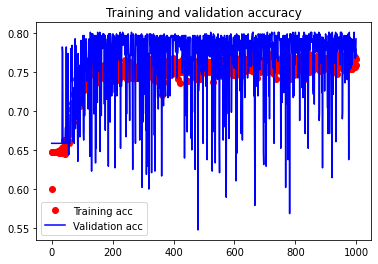

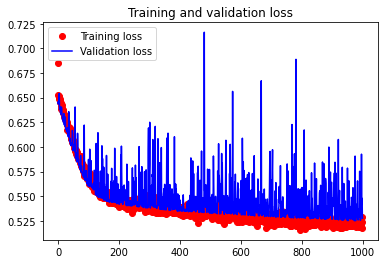

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Evaluate

In [19]:
model.evaluate(X_train, y_train, return_dict=True)

23/23 [==============================] - 0s 2ms/step - loss: 0.5178 - accuracy: 0.7678


{'loss': 0.5178384184837341, 'accuracy': 0.7678321599960327}

In [20]:
model.evaluate(X_valid, y_valid, return_dict=True)

15/15 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.7925


{'loss': 0.5276165008544922, 'accuracy': 0.7924528121948242}

In [21]:
model.evaluate(X_test, y_test, return_dict=True)

25/25 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.7761


{'loss': 0.5325643420219421, 'accuracy': 0.7761006355285645}

In [30]:
test_predictions = np.round(model.predict(X_test),0)
test_predictions


25/25 [==============================] - 0s 971us/step


array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],

In [23]:
predict_labels = y_test
len(predict_labels)

795

In [31]:
errors = predict_labels != test_predictions
np.sum(errors[1])/len(errors)




0.6289308176100629